In [12]:
#import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pt
import numpy as np
import plotly.express as px

In [13]:
#read file
coin_df = pd.read_csv("consolidated_coin_data.csv")

In [14]:
coin_df.head()

,Currency,Date,Open,High,Low,Close,Volume,Market Cap
0,tezos,"Dec 04, 2019",1.29,1.32,1.25,1.25,"46,048,752","824,588,509"
1,tezos,"Dec 03, 2019",1.24,1.32,1.21,1.29,"41,462,224","853,213,342"
2,tezos,"Dec 02, 2019",1.25,1.26,1.2,1.24,"27,574,097","817,872,179"
3,tezos,"Dec 01, 2019",1.33,1.34,1.25,1.25,"24,127,567","828,296,390"
4,tezos,"Nov 30, 2019",1.31,1.37,1.31,1.33,"28,706,667","879,181,680"


# Q2

First, I will analyze the raw dataset and make sure I only have the colunms I want to work with.

I will be analyzing the “consolidated_coin_data.csv” dataset to check the variables.

As all columns are of the variable type object I will modify them so that I can generate the applicable views.

The main columns that I will be working on will be:

'Currency'<br>
Name of currency

'Date'<br>
Date refers to the calendar date for the particular row - 24 hours midnight to midnight

'High'<br>
Highest recorded trading price of the day

'Volume'<br>
Volume represents the monetary value of the currency traded in a 24 hour period.

'Market Cap'<br>
Market cap is circulating supply x price of the coin. 


By analysing the first colunm 'Currency' to verify how many currencies are in the dataset we can see that we have 12 currencies.
I have noticed that in the description of this assignment I was required to analyze 10 currencies, but it was not clear for me that I should filter the dataset in order to work with only 10 currencies. Therefore, I will be working with all of them.

To display the visualization of the  change in the “High” value I will be following some steps:

- Select the columns that I will work on for this exercise. Being them 'Currency', 'Date',	'High',	'Volume' and	'Market Cap'
- Analyze the dataset to see how many unique values  there are in Currency column.
- Clear the data set by eliminating ','.
- Analyze the data types of the columns and change from object datatype to numeric
- For 'Date' I modified to_datetime.

Now I will be able to generate a plot that details change in the “High” value for all the Currencies over
time.

 

In [15]:
#load columns from the data
columns = ['Currency','Date','High','Volume', 'Market Cap'] 
currencies_df = pd.read_csv("consolidated_coin_data.csv")[columns]

In [16]:
currencies_df.head()

,Currency,Date,High,Volume,Market Cap
0,tezos,"Dec 04, 2019",1.32,"46,048,752","824,588,509"
1,tezos,"Dec 03, 2019",1.32,"41,462,224","853,213,342"
2,tezos,"Dec 02, 2019",1.26,"27,574,097","817,872,179"
3,tezos,"Dec 01, 2019",1.34,"24,127,567","828,296,390"
4,tezos,"Nov 30, 2019",1.37,"28,706,667","879,181,680"


In [17]:
#checking how many unique values in the colunm 'Currency'
currencies_df.Currency.unique()

array(['tezos', 'binance-coin', 'eos', 'bitcoin', 'tether', 'xrp',
       'bitcoin-cash', 'stellar', 'litecoin', 'ethereum', 'cardano',
       'bitcoin-sv'], dtype=object)

In [18]:
#Check data types
currencies_df.dtypes

Currency      object
Date          object
High          object
Volume        object
Market Cap    object
dtype: object

First Column to be modyfied will be the colunm 'Date'

In [19]:
currency_High = currencies_df

#modifying 'Date' to datetime
currency_High['Date'] = pd.to_datetime(currency_High['Date'])

In [20]:
currency_High.head()

,Currency,Date,High,Volume,Market Cap
0,tezos,2019-12-04,1.32,"46,048,752","824,588,509"
1,tezos,2019-12-03,1.32,"41,462,224","853,213,342"
2,tezos,2019-12-02,1.26,"27,574,097","817,872,179"
3,tezos,2019-12-01,1.34,"24,127,567","828,296,390"
4,tezos,2019-11-30,1.37,"28,706,667","879,181,680"


In [21]:
currency_High.dtypes

Currency              object
Date          datetime64[ns]
High                  object
Volume                object
Market Cap            object
dtype: object

As we can see 'Date' that was as dtype object now is datetime.

In [22]:
#'High' column is dtype object as we can see is defined as 'str'
currency_High_tonumeric = currency_High.copy()
currency_High_tonumeric['High'].apply(type)

0        <class 'str'>
1        <class 'str'>
2        <class 'str'>
3        <class 'str'>
4        <class 'str'>
             ...      
28939    <class 'str'>
28940    <class 'str'>
28941    <class 'str'>
28942    <class 'str'>
28943    <class 'str'>
Name: High, Length: 28944, dtype: object

In [23]:
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)


In [24]:
currency_High_tonumeric['High'] = currency_High_tonumeric['High'].apply(clean_currency).astype('float')

In [25]:
currency_High_tonumeric['High'].apply(type)

0        <class 'float'>
1        <class 'float'>
2        <class 'float'>
3        <class 'float'>
4        <class 'float'>
              ...       
28939    <class 'float'>
28940    <class 'float'>
28941    <class 'float'>
28942    <class 'float'>
28943    <class 'float'>
Name: High, Length: 28944, dtype: object

In [26]:
currency_High_tonumeric.dtypes

Currency              object
Date          datetime64[ns]
High                 float64
Volume                object
Market Cap            object
dtype: object

In [27]:
currency_High_tonumeric.head()

,Currency,Date,High,Volume,Market Cap
0,tezos,2019-12-04,1.32,"46,048,752","824,588,509"
1,tezos,2019-12-03,1.32,"41,462,224","853,213,342"
2,tezos,2019-12-02,1.26,"27,574,097","817,872,179"
3,tezos,2019-12-01,1.34,"24,127,567","828,296,390"
4,tezos,2019-11-30,1.37,"28,706,667","879,181,680"


# 17-35-year olds

Text(0, 0.5, 'Currency')

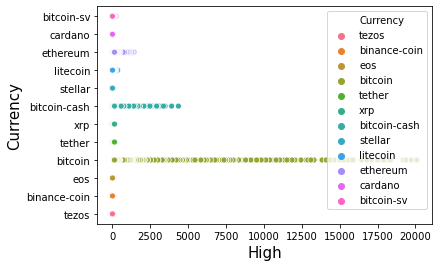

In [88]:
ax = sns.scatterplot(x="High", y="Currency", data=currency_High_tonumeric, hue = "Currency")
ax.set_xlabel('High', fontdict={'fontsize' : 15})
ax.set_ylabel('Currency', fontdict={'fontsize' : 15})

The sactterplot is one of the main tools that can be used for data visualization that can be easily interpreted by all age groups.<br>
For the demonstration of the change in 'High' column for the group age 60+ in this exercise I will be using the scatterplot and limiting the number of colors for the currencies to one.

# 60+ age group

Text(0, 0.5, 'Date')

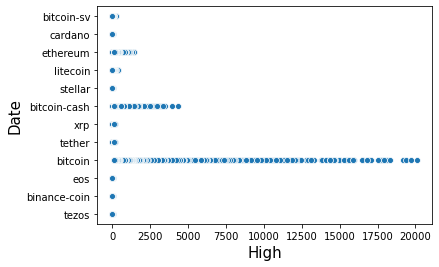

In [29]:
ax = sns.scatterplot(x="High", y="Currency", data=currency_High_tonumeric)
ax.set_xlabel('High', fontdict={'fontsize' : 15})
ax.set_ylabel('Date', fontdict={'fontsize' : 15})

# Q3

To display the visualization of the chart depicting 'Volume' from years 2016 - 2019 for the top 3 currencies I held the following steps:
- Filter the top 3 coins
- Filter the dataset so that it has information only between the year 2016 and 2019.
- Clear the dataset by replacing ','.
- Change object data types to numeric.
- create a subset of the top 3 currencies.

Now I can plot a graph depicting the “Volume” by Currency between 2016 and 2019 for the
top 3 Currencies.

In [30]:
#filter top 3 Currencies by Market Cap
top_3_currencies = currencies_df.groupby(by=['Currency'])['Market Cap'].agg("sum").sort_values(ascending=False).reset_index().head(3)

In [36]:
top_3_currencies.head()

,Currency,Market Cap
0,cardano,"969,802,335983,080,974986,684,9201,026,365,437..."
1,xrp,"9,364,745,6889,517,202,0269,507,818,7609,756,8..."
2,tezos,"824,588,509853,213,342817,872,179828,296,39087..."


In [37]:
top_countries_beer=["bitcoin","cardano","xrp"]

In [40]:
#filter date from 2016 to 2019
currency_volume_2016_2019 = currencies_df

currency_volume_2016_2019['Date'] = pd.to_datetime(currency_volume_2016_2019['Date'])

start_date = '2016-01-01'
end_date = '2019-12-31'

mask = (currency_volume_2016_2019['Date'] > start_date) & (currency_volume_2016_2019['Date'] <= end_date)

currency_volume_2016_2019 = currency_volume_2016_2019.loc[mask]
currency_volume_2016_2019.head()

,Currency,Date,High,Volume,Market Cap
0,tezos,2019-12-04,1.32,"46,048,752","824,588,509"
1,tezos,2019-12-03,1.32,"41,462,224","853,213,342"
2,tezos,2019-12-02,1.26,"27,574,097","817,872,179"
3,tezos,2019-12-01,1.34,"24,127,567","828,296,390"
4,tezos,2019-11-30,1.37,"28,706,667","879,181,680"


In [41]:
currency_volume_2016_2019.Currency.unique()

array(['tezos', 'binance-coin', 'eos', 'bitcoin', 'tether', 'xrp',
       'bitcoin-cash', 'stellar', 'litecoin', 'ethereum', 'cardano',
       'bitcoin-sv'], dtype=object)

In [42]:
currency_volume_2016_2019.dtypes

Currency              object
Date          datetime64[ns]
High                  object
Volume                object
Market Cap            object
dtype: object

In [43]:
#clean dataset replacing ','by ''
currency_volume_2016_2019['Volume'] = currency_volume_2016_2019['Volume'].str.replace(',', '')

<ipython-input-43-90052983b2d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  currency_volume_2016_2019['Volume'] = currency_volume_2016_2019['Volume'].str.replace(',', '')


In [44]:
currency_volume_2016_2019_modified = currency_volume_2016_2019.copy()
currency_volume_2016_2019_modified['Volume'].apply(type)

0        <class 'str'>
1        <class 'str'>
2        <class 'str'>
3        <class 'str'>
4        <class 'str'>
             ...      
27960    <class 'str'>
27961    <class 'str'>
27962    <class 'str'>
27963    <class 'str'>
27964    <class 'str'>
Name: Volume, Length: 17196, dtype: object

In [45]:
#transform data type object to data type float
currency_volume_2016_2019_modified['Volume'] = currency_volume_2016_2019_modified['Volume'].apply(clean_currency).astype('float')

currency_volume_2016_2019_modified['Market Cap'] = currency_volume_2016_2019_modified['Market Cap'].apply(clean_currency).astype('float')
currency_volume_2016_2019_modified['Market Cap'].apply(type)

0        <class 'float'>
1        <class 'float'>
2        <class 'float'>
3        <class 'float'>
4        <class 'float'>
              ...       
27960    <class 'float'>
27961    <class 'float'>
27962    <class 'float'>
27963    <class 'float'>
27964    <class 'float'>
Name: Market Cap, Length: 17196, dtype: object

In [46]:
currency_volume_2016_2019_modified['Volume'].apply(type)

0        <class 'float'>
1        <class 'float'>
2        <class 'float'>
3        <class 'float'>
4        <class 'float'>
              ...       
27960    <class 'float'>
27961    <class 'float'>
27962    <class 'float'>
27963    <class 'float'>
27964    <class 'float'>
Name: Volume, Length: 17196, dtype: object

In [47]:
currency_volume_2016_2019_modified.dtypes

Currency              object
Date          datetime64[ns]
High                  object
Volume               float64
Market Cap           float64
dtype: object

In [48]:
currency_volume_2016_2019_modified

,Currency,Date,High,Volume,Market Cap
0,tezos,2019-12-04,1.32,46048752.0,824588509.0
1,tezos,2019-12-03,1.32,41462224.0,853213342.0
2,tezos,2019-12-02,1.26,27574097.0,817872179.0
3,tezos,2019-12-01,1.34,24127567.0,828296390.0
4,tezos,2019-11-30,1.37,28706667.0,879181680.0
...,...,...,...,...,...
27960,bitcoin-sv,2016-01-06,3.47,2208860.0,151734839.0
27961,bitcoin-sv,2016-01-05,3.51,2104650.0,152390643.0
27962,bitcoin-sv,2016-01-04,3.51,3309740.0,153467942.0
27963,bitcoin-sv,2016-01-03,3.51,2406150.0,152873557.0


In [49]:
#subset the 3 top currencies
currencie_top3_MarketCap = ['bitcoin', 'xrp', 'ethereum']

In [50]:
# subset the DataFrame to include data from the top 3 currencies
currencie_top3_MarketCap = currency_volume_2016_2019_modified[(currency_volume_2016_2019_modified.Currency.isin(currencie_top3_MarketCap))]

In [51]:
currencie_top3_MarketCap

,Currency,Date,High,Volume,Market Cap
7236,bitcoin,2019-12-04,"7,539.78",2.166424e+10,1.311431e+11
7237,bitcoin,2019-12-03,"7,418.86",1.479749e+10,1.323599e+11
7238,bitcoin,2019-12-02,"7,474.82",1.708204e+10,1.323790e+11
7239,bitcoin,2019-12-01,"7,571.62",1.872071e+10,1.342151e+11
7240,bitcoin,2019-11-30,"7,836.10",1.715819e+10,1.368294e+11
...,...,...,...,...,...
23136,ethereum,2016-01-06,0.960659,3.087910e+05,7.231715e+07
23137,ethereum,2016-01-05,0.970597,2.198330e+05,7.224097e+07
23138,ethereum,2016-01-04,0.976438,3.462450e+05,7.254371e+07
23139,ethereum,2016-01-03,0.991362,4.076320e+05,7.384329e+07


# Top 3 Currencies by Market Cap

I have selected the top 3 currencies in two ways:

- the first one I made based on the Market Cap value from which I am generating only one graph.
- the second selection of the 3 main currencies was based on the volume from which I will generate the two different graphs for each age group.

Text(0, 0.5, 'Date')

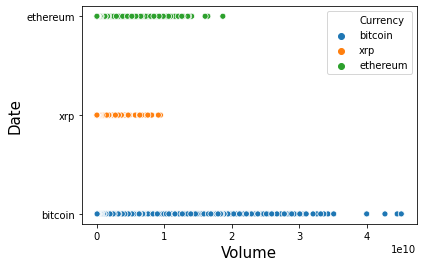

In [52]:
ax = sns.scatterplot(x="Volume", y="Currency", data=currencie_top3_MarketCap, hue='Currency')
ax.set_xlabel('Volume', fontdict={'fontsize' : 15})
ax.set_ylabel('Date', fontdict={'fontsize' : 15})

# Top 3 Currencies by Volume

In [54]:
#top 3 currencies by Volume
currencie_top3 = ['bitcoin', 'tether', 'ethereum']

In [55]:
# subset the DataFrame to include data from the top 3 currencies
currencie_top3 = currency_volume_2016_2019_modified[(currency_volume_2016_2019_modified.Currency.isin(currencie_top3))]

In [56]:
currencie_top3

,Currency,Date,High,Volume,Market Cap
7236,bitcoin,2019-12-04,"7,539.78",2.166424e+10,1.311431e+11
7237,bitcoin,2019-12-03,"7,418.86",1.479749e+10,1.323599e+11
7238,bitcoin,2019-12-02,"7,474.82",1.708204e+10,1.323790e+11
7239,bitcoin,2019-12-01,"7,571.62",1.872071e+10,1.342151e+11
7240,bitcoin,2019-11-30,"7,836.10",1.715819e+10,1.368294e+11
...,...,...,...,...,...
23136,ethereum,2016-01-06,0.960659,3.087910e+05,7.231715e+07
23137,ethereum,2016-01-05,0.970597,2.198330e+05,7.224097e+07
23138,ethereum,2016-01-04,0.976438,3.462450e+05,7.254371e+07
23139,ethereum,2016-01-03,0.991362,4.076320e+05,7.384329e+07


# 17-35-year olds

Text(0, 0.5, 'Volume')

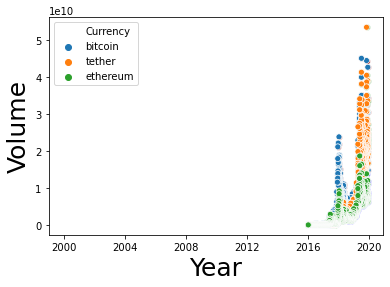

In [94]:
fig1 = pt.figure()

ax = fig1.add_subplot(111)

ax = sns.scatterplot(x="Date", y="Volume", data=currencie_top3[currencie_top3['Currency']=='bitcoin'], color='darkred')
ax = sns.scatterplot(x="Date", y="Volume", data=currencie_top3[currencie_top3['Currency']=='tether'], color='green')
ax = sns.scatterplot(x="Date", y="Volume", data=currencie_top3[currencie_top3['Currency']=='ethereum'], color='blue')
ax = sns.scatterplot(x="Date", y="Volume", data=currencie_top3, hue='Currency')
ax.set_xlabel('Year', fontdict={'fontsize' : 25})
ax.set_ylabel('Volume', fontdict={'fontsize' : 25})
#ax = sns.lineplot(x="Date", y="Volume", data=currency_volume_2016_2019_modified[currency_volume_2016_2019_modified['Currency']=='bitcoin-sv'], color='darkred')



For the demonstration of the  “Volume”  values for the group age 17-35 I am using the scatterplot and using different colors for each Currency.<br>
For age 60+ in this exercise I will be using the boxplot.
Boxplot makes a better visualization to any person that looks at it can understand that  the depicting Volume for bitcoin is bigger than tether and Ethereum.

# 60+ age group

Text(0, 0.5, 'Volume')

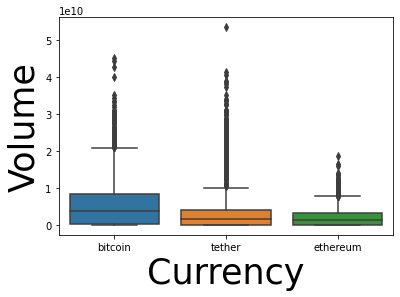

In [95]:
ax = sns.boxplot(x='Currency', y='Volume', data=currencie_top3)
ax.set_xlabel('Currency', fontdict={'fontsize' : 35})
ax.set_ylabel('Volume', fontdict={'fontsize' : 35})

# REFERENCES

Pandas.pydata.org. 2020. Pandas.To_Numeric — Pandas 1.2.0 Documentation. [online] Available at: <https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html> [Accessed 28 December 2020].

Pandas, R. and Manghwani, P., 2020. Replace Comma And Dot In Pandas. [online] Stack Overflow. Available at: <https://stackoverflow.com/questions/56315468/replace-comma-and-dot-in-pandas> [Accessed 28 December 2020].

Moffitt, C., 2020. Cleaning Up Currency Data With Pandas - Practical Business Python. [online] Pbpython.com. Available at: <https://pbpython.com/currency-cleanup.html> [Accessed 28 December 2020].

Medium. 2020. Python Speed Test: 5 Methods To Remove The ‘$’ From Your Data In Python. [online] Available at: <https://towardsdatascience.com/5-methods-to-remove-the-from-your-data-in-python-and-the-fastest-one-281489382455> [Accessed 28 December 2020].

python work problem:ValueError: Index contains duplicate entries, c., 2020. Python Work Problem:Valueerror: Index Contains Duplicate Entries, Cannot Reshape. [online] Stack Overflow. Available at: <https://stackoverflow.com/questions/59613564/python-work-problemvalueerror-index-contains-duplicate-entries-cannot-reshape> [Accessed 28 December 2020].

Pandas.pydata.org. 2020. Reshaping And Pivot Tables — Pandas 1.2.0 Documentation. [online] Available at: <https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html> [Accessed 28 December 2020].

Bhalla, D., 2020. Python : 10 Ways To Filter Pandas Dataframe. [online] ListenData. Available at: <https://www.listendata.com/2019/07/how-to-filter-pandas-dataframe.html> [Accessed 28 December 2020].